Code based on, https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103

In [7]:
#!pip install tensorflow-gpu
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

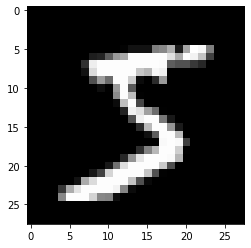

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()

In [26]:
LATENT_SIZE = 16
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE, activation="sigmoid"),
])

In [25]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

In [27]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 16)                575440    
_________________________________________________________________
sequential_6 (Sequential)    (None, 56, 56)            1782784   
Total params: 2,358,224
Trainable params: 2,358,224
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# filepath = "mns.ckpt"
# checkpoint = keras.callbacks.ModelCheckpoint(filepath, save_weights_only=True, verbose=1)

In [ ]:
## load previous model
# from tensorflow import keras
# loaded_model = keras.models.load_model('mnist_autoencoder.h5')
# model = loaded_model

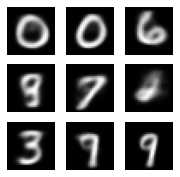

----------- EPOCH 29 -----------
118/118 [==============================] - 2s 16ms/step - loss: 0.1870


In [28]:
EPOCHS = 30
TRAIN_BATCH_SIZE = 512
FIG_COUNT = 3
FIG_COUNT_SQUARE = FIG_COUNT * FIG_COUNT

#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(FIG_COUNT, FIG_COUNT, figsize=(FIG_COUNT,FIG_COUNT))
    rand = x_test[np.random.randint(0, 10000, FIG_COUNT_SQUARE)].reshape((FIG_COUNT, FIG_COUNT, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(FIG_COUNT):
        for j in range(FIG_COUNT):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train, batch_size = TRAIN_BATCH_SIZE)
    #loaded_model.fit(x_train, x_train, batch_size = TRAIN_BATCH_SIZE, callbacks=[checkpoint])





In [29]:
## Save and reload model for inference
## Alternate saving method `tf.keras.models.save_model()`
model.save('mnist_autoencoder.h5')

from tensorflow import keras
loaded_model = keras.models.load_model('mnist_autoencoder.h5')

tf.Tensor(
[[4.54799794e-02 2.02901840e-01 2.31076613e-01 1.00000000e+00
  7.01922865e-04 5.18236719e-02 4.56624717e-01 4.51514591e-03
  1.35064676e-01 1.03125066e-01 7.51049519e-01 8.36327225e-02
  1.18075041e-04 8.81486610e-02 3.99681568e-01 5.24762988e-01]], shape=(1, 16), dtype=float32)
(1, 28, 28)


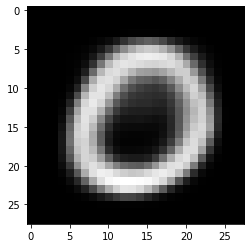

(1, 28, 28)


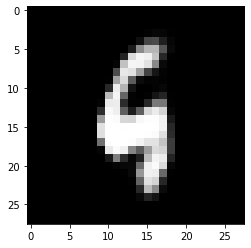

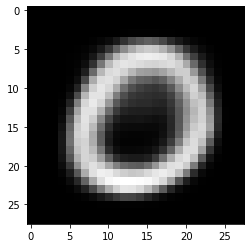

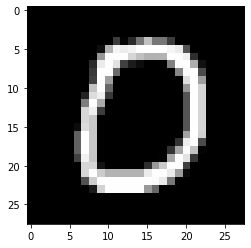

In [39]:
## Predict with model
#plt.imshow(model.predict(x_test[10].reshape(1,28,28))[0], cmap = "gray")
#plt.show()


random_test_image = x_test[10].reshape(1,28,28)


## Show decoded image
print(encoder(random_test_image))
decoded_image = decoder(encoder(random_test_image))
print(decoded_image.shape)
plt.imshow(np.squeeze(decoded_image), cmap = "gray")
plt.show()


## Passing a random tensor to decoder to generate random output
arr = keras.backend.constant([[1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6]])
decoded_image = decoder(arr)
print(decoded_image.shape)
plt.imshow(np.squeeze(decoded_image), cmap = "gray")
plt.show()


## Predict from saved and loaded model
plt.imshow(loaded_model.predict(random_test_image)[0], cmap = "gray")
plt.show()


## Show original image
plt.imshow(x_test[10], cmap = "gray")
plt.show()

(1, 28, 28)


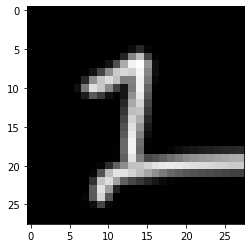

tf.Tensor(
[[6.1301016e-19 1.0000000e+00 0.0000000e+00 1.0000000e+00 3.2320729e-20
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.9813085e-38 7.1888851e-26
  1.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.3276450e-01
  0.0000000e+00]], shape=(1, 16), dtype=float32)
(1, 28, 28)


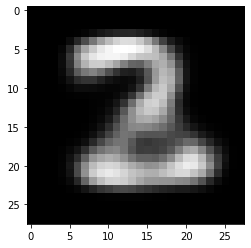

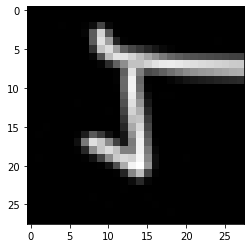

tf.Tensor(
[[0.0000000e+00 5.1071951e-05 0.0000000e+00 1.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.1827306e-26 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.4118912e-20 1.2413526e-08
  1.0000000e+00]], shape=(1, 16), dtype=float32)
(1, 28, 28)


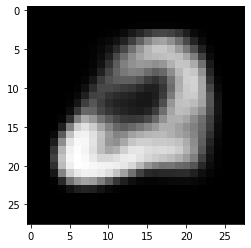

In [41]:
## Load custom drawn image and show its encoding and predicted output
import cv2 as cv


custom_image = cv.imread("resources/two.jpg", 0)


custom_image = np.invert(custom_image)
#print(custom_image.shape)
#print(custom_image)


#custom_image = np.array(custom_image) / 255.0
#custom_image = custom_image / 255.0
custom_image = custom_image.reshape(1,28,28)

print(custom_image.shape)
#print(custom_image)

plt.imshow(custom_image.reshape((28,28)), cmap = "gray")
plt.show()


## Show decoded image
print(encoder(custom_image))
decoded_image = decoder(encoder(custom_image))
print(decoded_image.shape)
plt.imshow(np.squeeze(decoded_image), cmap = "gray")
plt.show()



#custom_image = cv.rotate(custom_image, cv.ROTATE_180)
custom_image = cv.flip(custom_image, -1)
#custom_image = cv.flip(custom_image, 1)

plt.imshow(custom_image.reshape((28,28)), cmap = "gray")
plt.show()


## Show decoded image
print(encoder(custom_image))
decoded_image = decoder(encoder(custom_image))
print(decoded_image.shape)
plt.imshow(np.squeeze(decoded_image), cmap = "gray")
plt.show()


In [ ]:
## Install latest opencv, which was 4.4.0 on last run
#!pip install opencv-python --upgrade
#!pip install opencv-contrib-python --upgrade

In [42]:
import cv2 as cv
print(cv.__version__)

4.1.2
